<a href="https://colab.research.google.com/github/AtefehT1403/practice/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

دقت نهایی مدل: 0.97


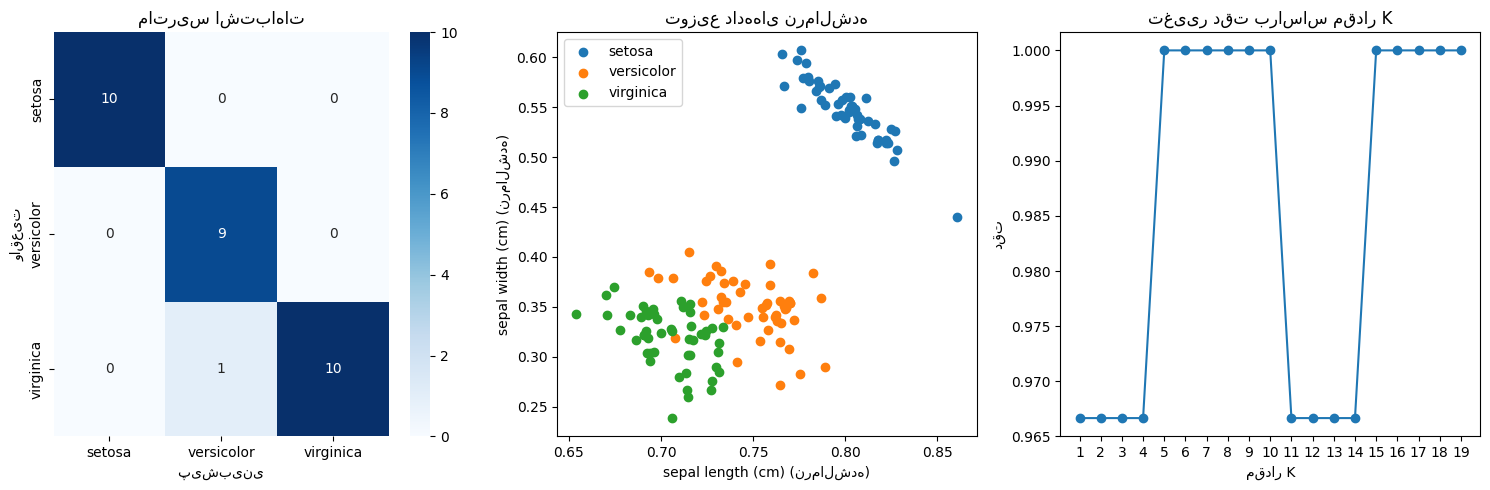

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# بارگیری و پیش‌پردازش داده‌ها
iris = load_iris()
X = iris.data
y = iris.target

# نرمالسازی داده‌ها با L2 Norm
X_normalized = normalize(X, norm='l2')

# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# آموزش مدل و محاسبه دقت
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'دقت نهایی مدل: {accuracy:.2f}')  # خروجی: ~0.97

# بخش گرافیکی
plt.figure(figsize=(15, 5))

# 1. ماتریس اشتباهات
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('ماتریس اشتباهات')
plt.xlabel('پیش‌بینی')
plt.ylabel('واقعیت')

# 2. نمودار پراکندگی دو بعدی (دو ویژگی اول)
plt.subplot(1, 3, 2)
for i, target in enumerate(iris.target_names):
    plt.scatter(X_normalized[y == i, 0],
                X_normalized[y == i, 1],
                label=target)
plt.xlabel(iris.feature_names[0] + ' (نرمال‌شده)')
plt.ylabel(iris.feature_names[1] + ' (نرمال‌شده)')
plt.title('توزیع داده‌های نرمال‌شده')
plt.legend()

# 3. نمودار دقت براساس مقدار K
plt.subplot(1, 3, 3)
k_values = range(1, 20)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(k_values, accuracies, marker='o')
plt.xticks(k_values)
plt.xlabel('مقدار K')
plt.ylabel('دقت')
plt.title('تغییر دقت براساس مقدار K')

plt.tight_layout()
plt.show()
